# **Heart Failure Prediction Dataset**
11 clinical features for predicting heart disease events.

**About Dataset**

Similar Datasets

Hepatitis C Dataset: LINK
Body Fat Prediction Dataset: LINK
Cirrhosis Prediction Dataset: LINK
Stroke Prediction Dataset: LINK
Stellar Classification Dataset - SDSS17: LINK
Wind Speed Prediction Dataset: LINK
Spanish Wine Quality Dataset: LINK

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

**Source**

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

**Citation**

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.




**Acknowledgements**

*Creators:*

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

*Donor:*
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

kaggle link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
#memanggil data
import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **Data Cleansing**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print(data.Sex.unique(),"\n\n",data.ChestPainType.unique(),"\n\n",
      data.RestingECG.unique(),"\n\n",data.ExerciseAngina.unique(),'\n\n',
      data.ST_Slope.unique(),'\n\n',data.HeartDisease.unique())

['M' 'F'] 

 ['ATA' 'NAP' 'ASY' 'TA'] 

 ['Normal' 'ST' 'LVH'] 

 ['N' 'Y'] 

 ['Up' 'Flat' 'Down'] 

 [0 1]


# **EDA**

In [ ]:
#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


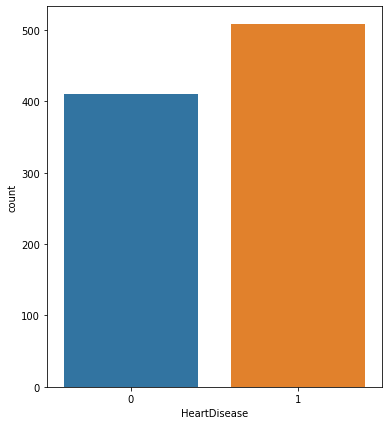

In [ ]:
plt.figure(figsize=(6,7))
sns.countplot(data.HeartDisease)

In [65]:
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Berdasarkan data di atas, dapat dilihat bahwa jumlah yang terserang Heart Diseas (Penyakit Jantung) sebanyak 508 orang dan Normal sebanyak 410 orang.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

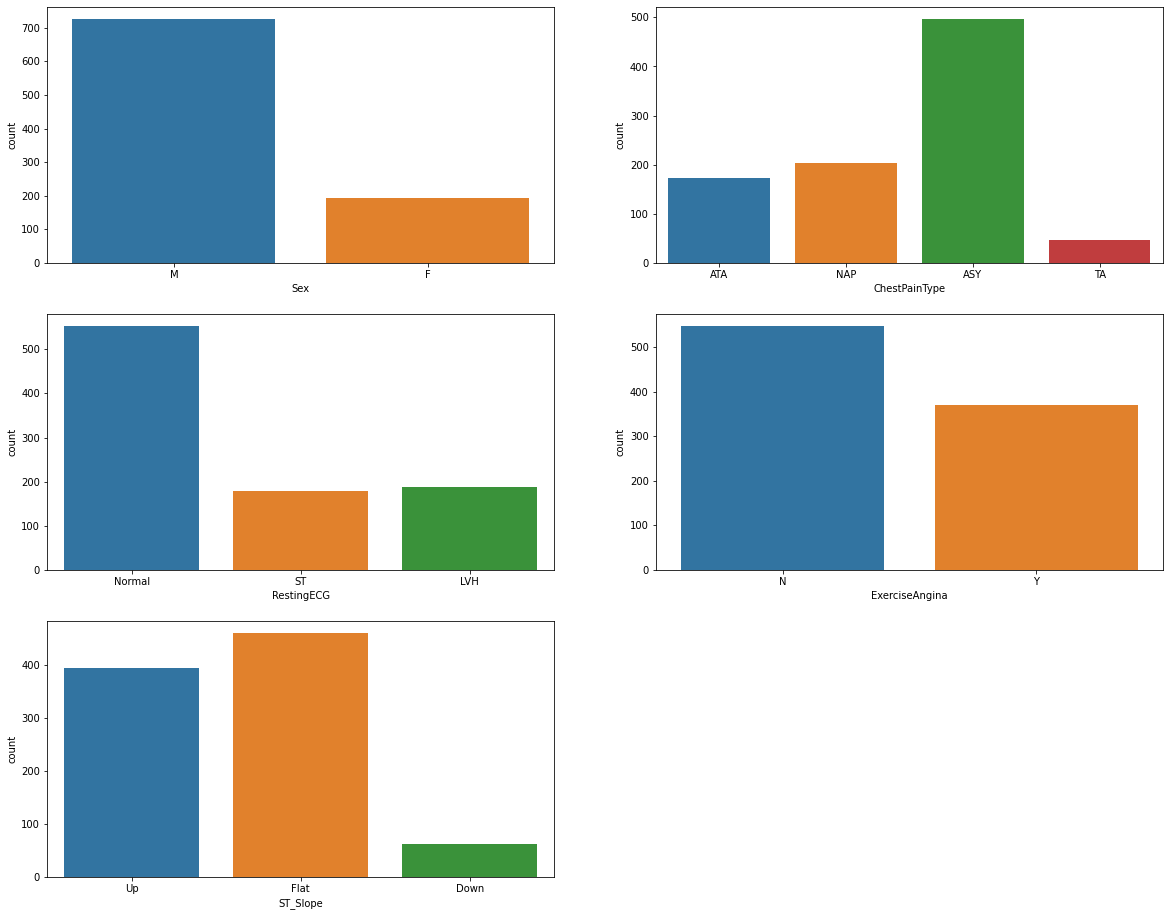

In [ ]:
plt.figure(figsize=(20,16))

plt.subplot(3,2,1)
sns.countplot(data.Sex)

plt.subplot(3,2,2)
sns.countplot(data.ChestPainType)

plt.subplot(3,2,3)
sns.countplot(data.RestingECG)

plt.subplot(3,2,4)
sns.countplot(data.ExerciseAngina)

plt.subplot(3,2,5)
sns.countplot(data.ST_Slope)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

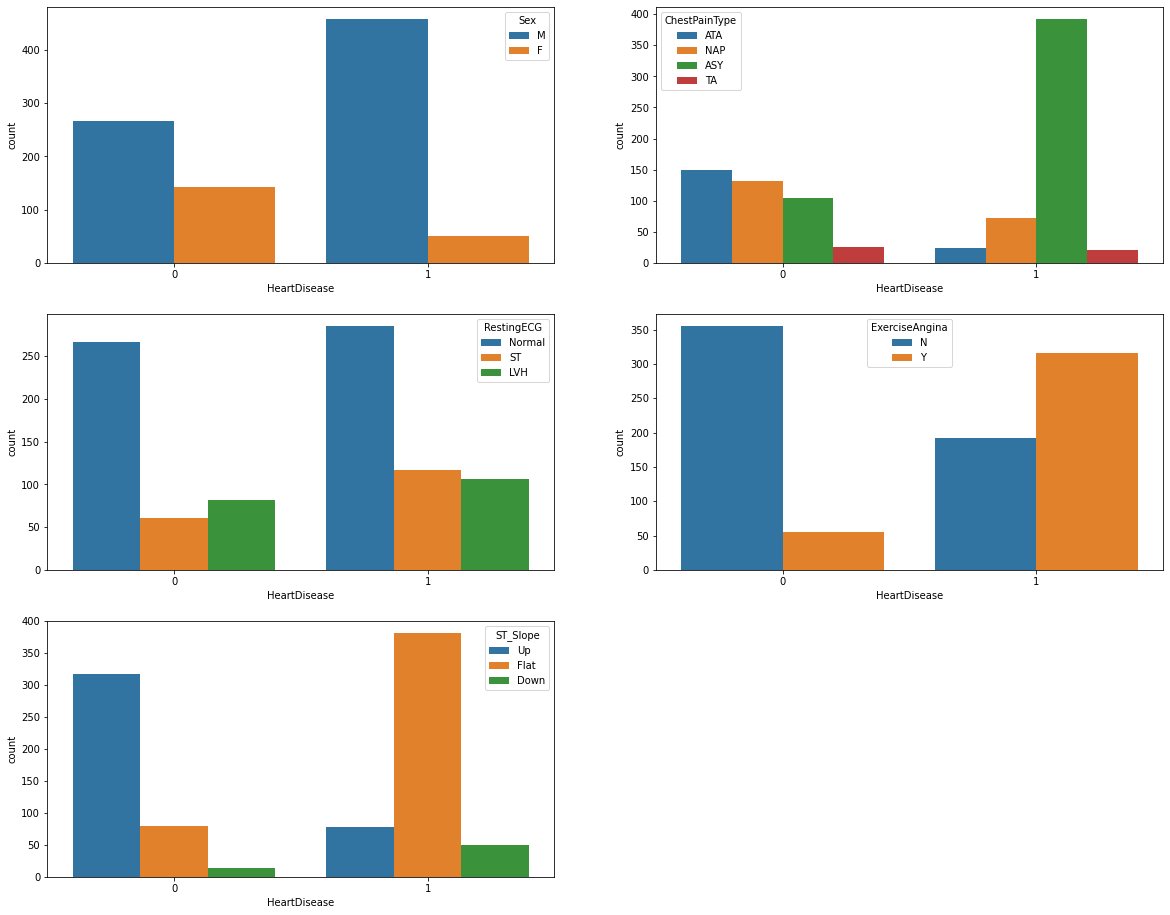

In [ ]:
plt.figure(figsize=(20,16))

plt.subplot(3,2,1)
sns.countplot(data.HeartDisease, hue=data.Sex)

plt.subplot(3,2,2)
sns.countplot(data.HeartDisease, hue=data.ChestPainType)

plt.subplot(3,2,3)
sns.countplot(data.HeartDisease, hue=data.RestingECG)

plt.subplot(3,2,4)
sns.countplot(data.HeartDisease, hue=data.ExerciseAngina)

plt.subplot(3,2,5)
sns.countplot(data.HeartDisease, hue=data.ST_Slope)

Visualisasi di atas menunjukkan bahwa jumlah penderita penyakit jantung jenis kelamin laki-laki lebih banyak dibandingkan perpempuan. Lalu tipe nyeri dada pada penderita penyakit jantung yang dominan adalah tanpa gejala (ASY). Sedangkan, Hasil resting elektrokardiogram yang mendominasi pada penderita penyakit jantung adalah normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

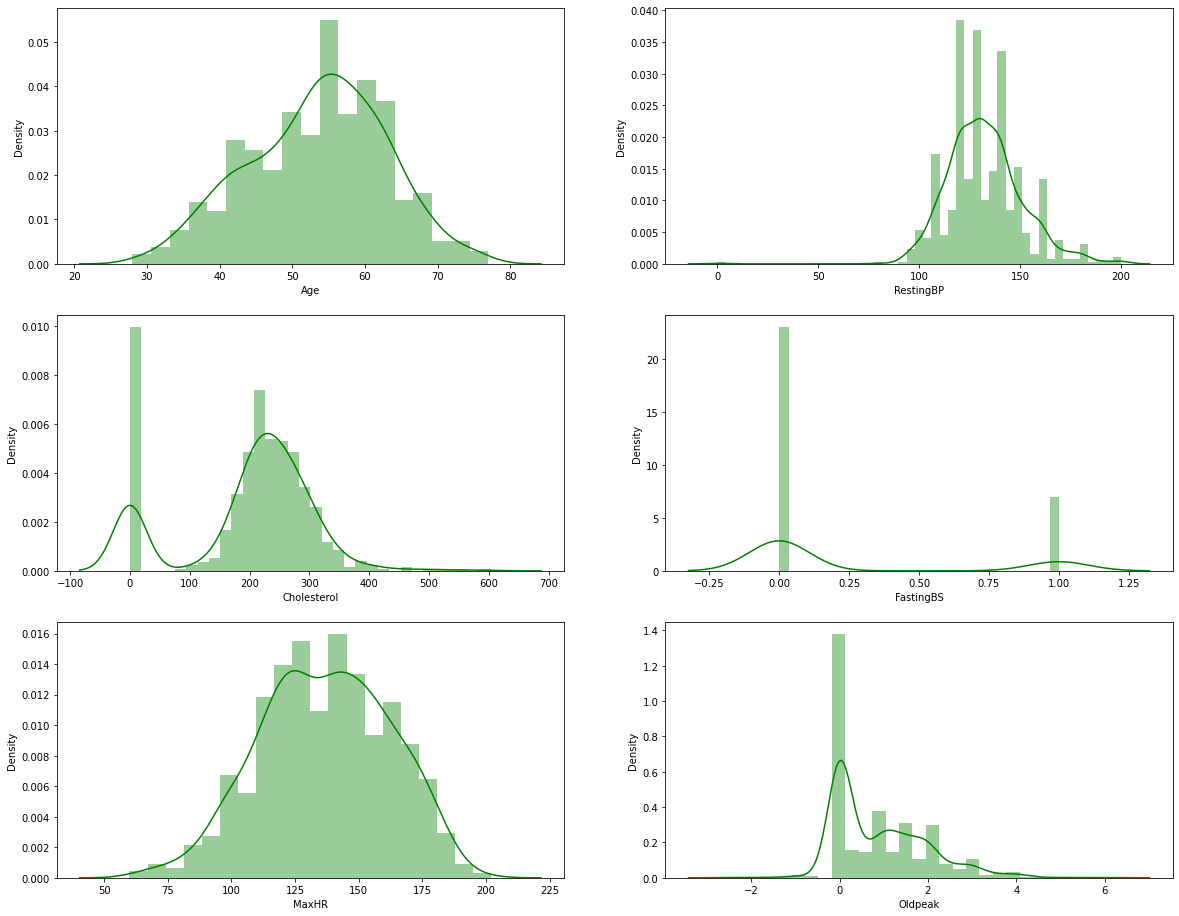

In [ ]:
To_Plot=[feature for feature in data.columns if data[feature].dtypes!='object']
numeric=data[To_Plot]

plt.figure(figsize=(20,16))
for n in range(1,7):
  plt.subplot(3,2,n)
  sns.distplot(numeric.iloc[:,n-1],color='green');

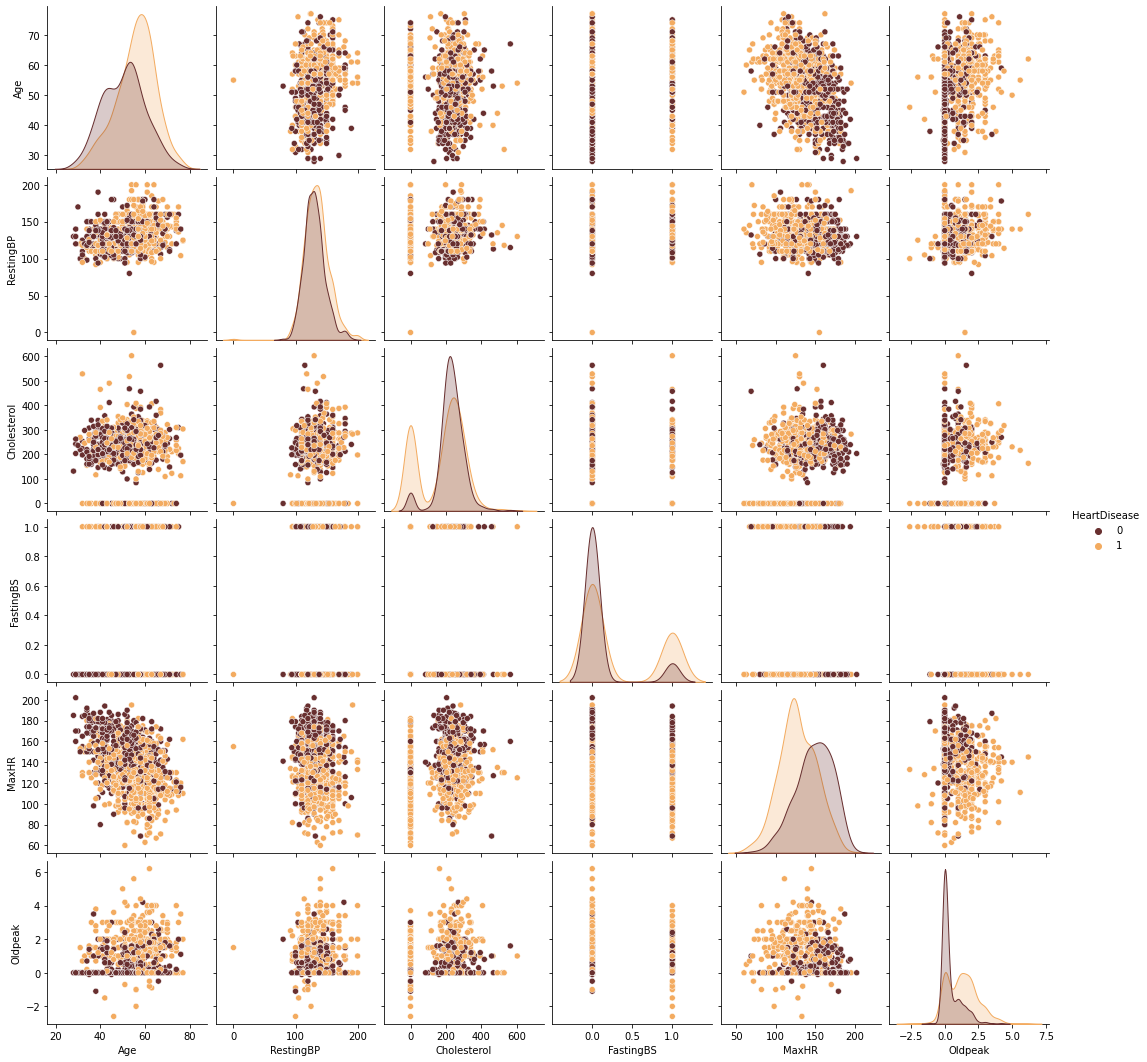

In [ ]:
To_Plot=[feature for feature in data.columns if data[feature].dtypes!='object']
sns.pairplot(data[To_Plot], hue= "HeartDisease",palette= (["#682F2F","#F3AB60"]))

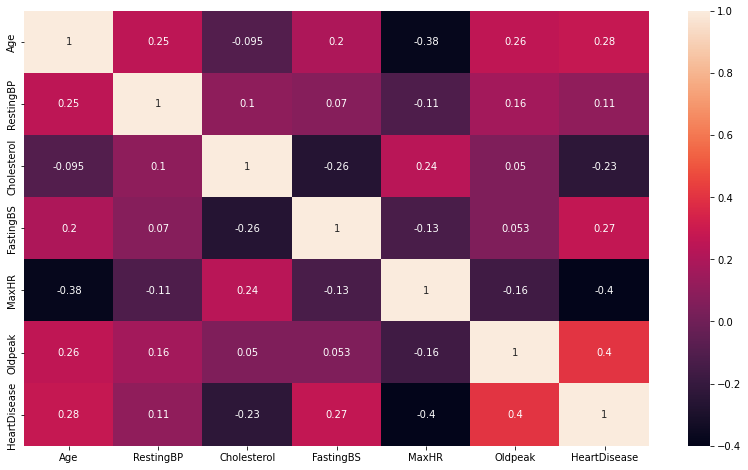

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)

Hasil heatmap menunjukkan bahwa variabel yang digunakan tidak saling berkorelasi kuat, yang ditandai dengan nilai korelasi < 0.8 atau > -0.8.

# **Classification**

Pada klasifikasi kali ini, akan dilakukan perbandingan dengan beberapa metode yaitu:
1. Logistic Regression
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Random Forest
5. eXtreme Gradient Boosting (XGBoost)

Selain itu, digunakan juga hyperparameter tuning Grid Search Cross Validation, dengan 10-fold cross validation. 

Perbandingan akan dilihat dengan cara membandingkan nilai akurasi dan f1 score dari data testing pada masing-masing metode. Untuk pembagian data training dan testing sendiri adalah 75% dan 25%.

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop('HeartDisease',axis=1)
X=pd.get_dummies(X)
y=data['HeartDisease']
# membentuk data training dan testing (75%:25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:
y_train.value_counts()

1    375
0    313
Name: HeartDisease, dtype: int64

Jumlah kategori penyakit jantung dan normal masing-masing adalah 375 orang dan 313 orang. Jumlah tersebut menujukkan datset yang balance sehingga tidak akan dilakukan resampling terhadap dataset.

In [ ]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
#classification
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

**Grid Search**

Proses pengerjaan machine learning pada umumnya meliputi uji coba berbagai model terhadap dataset dengan memilih model dengan performa terbaik. Untuk mendapatkan hasil prediksi data yang akurat, diperlukan tidak hanya model machine learning yang tepat, tetapi juga hyperparameter (parameter yang mengatur proses pembelajaran mesin) yang tepat pula yang dikenal dengan istilah hyperparameter tuning. Menentukan kombinasi yang tepat antara model dan hyperparameter seringkali menjadi tantangan.

Grid Search Cross Validation adalah metode pemilihan kombinasi model dan hyperparameter dengan cara menguji coba satu persatu kombinasi dan melakukan validasi untuk setiap kombinasi. Tujuannya adalah menentukan kombinasi yang menghasilkan performa model terbaik yang dapat dipilih untuk dijadikan model untuk prediksi.

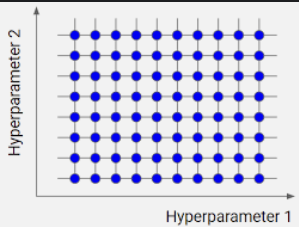

Dengan adanya Grid Search Cross Validation, proses pemilihan model dan hyperparameter tuning menjadi lebih mudah. Grid Search Cross Validation melakukan validasi untuk setiap kombinasi model dan hyperparameter secara otomatis sehingga dapat menghemat waktu proses pengerjaan.


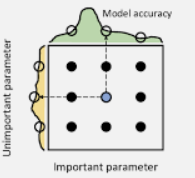

**K-Fold Cross-Validation**

Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. Selanjutnya pemilihan jenis CV dapat didasarkan pada ukuran dataset. Biasanya CV K-Fold digunakan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.

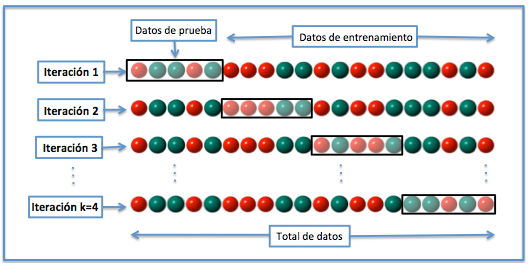

Metode ini sering juga disebut dengan k-fold cross validation dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama (Santosa dan Umam 2018) Dalam bukunya yang berjudul "Data Mining dan Big Data Analytics" Secara umum, kita akan membandingkan n model dalam cross validation ini, dalam arti lain fungsi dari penggunaan metode cross validation adalah:
1. Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
2. Untuk menningkatkan tingkat performansi dari model tersebut
3. Untuk mengolah data set dengan kelas yang seimbang

Dalam kasus klasifikasi, ada yang perlu diperhatikan dalam pembagian set data ke sejumlah k partisi, yaitu harus melakukan stratification  yang artinya kita akan mempartisi atau membagi set data tersebut ke k partisi denga komposisi kelas yang seimbang disetiap partisinya. Dengan kata lain, distribusi kelas setiap partisi harus sama antar kelas, yang berarti juga sama dengan distribusi kelas di set data originalnya.


In [ ]:
#logistic regression
logModel = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(logModel, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Logistic Regression
Best Score: 0.8575660699062233
Best Parameters: {'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.89      0.87      0.88       133

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

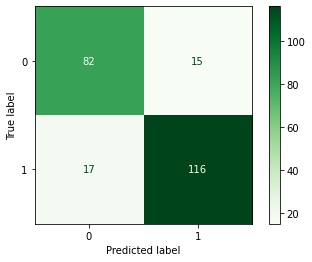

In [ ]:
logistic=LogisticRegression(C= 11.288378916846883, max_iter= 2000, penalty= 'l1', solver= 'liblinear').fit(X_train,y_train)
predlog=logistic.predict(X_test)

print(classification_report(y_test,predlog))
plt.figure(figsize=(8,8))
plot_confusion_matrix(logistic,X_test,y_test,cmap=plt.cm.Greens)
plt.show()

In [ ]:
print('Accuracy:',accuracy_score(y_test,predlog))
print('Precision:',precision_score(y_test,predlog,average='macro'))
print('Recall:',recall_score(y_test,predlog,average='macro'))
print('f1-score:',f1_score(y_test,predlog,average='macro'))

Accuracy: 0.8608695652173913
Precision: 0.8568895057444676
Recall: 0.8587706379350437
f1-score: 0.8577612863327149


In [ ]:
#KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 10, verbose = 2,  n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
KNN
Best Score: 0.7528985507246377
Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.74      0.75      0.75        97
           1       0.82      0.81      0.82       133

    accuracy                           0.79       230
   macro avg       0.78      0.78      0.78       230
weighted avg       0.79      0.79      0.79       230



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

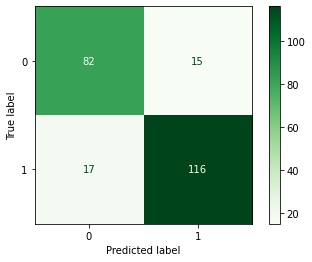

In [ ]:
KNN=KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 9, p = 1, weights= 'uniform').fit(X_train,y_train)
predKNN=KNN.predict(X_test)

print(classification_report(y_test,predKNN))
plt.figure(figsize=(8,8))
plot_confusion_matrix(logistic,X_test,y_test,cmap=plt.cm.Greens)
plt.show()

In [ ]:
print('Accuracy:',accuracy_score(y_test,predKNN))
print('Precision:',precision_score(y_test,predKNN,average='macro'))
print('Recall:',recall_score(y_test,predKNN,average='macro'))
print('f1-score:',f1_score(y_test,predKNN,average='macro'))

Accuracy: 0.7869565217391304
Precision: 0.7815398886827458
Recall: 0.7823036973877994
f1-score: 0.7819061441702951


In [ ]:
#SVM
svc = SVC(probability = True)
param_grid = [{'kernel': ['rbf'], 
               'gamma': [.1,.5,1,2,5,10],
               'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 10 folds for each of 30 candidates, totalling 300 fits
SVC
Best Score: 0.5566496163682864
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.67      0.06      0.11        97
           1       0.59      0.98      0.73       133

    accuracy                           0.59       230
   macro avg       0.63      0.52      0.42       230
weighted avg       0.62      0.59      0.47       230



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

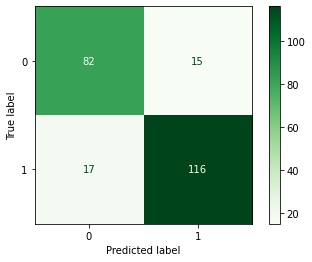

In [ ]:
SVM=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train,y_train)
predSVM=SVM.predict(X_test)

print(classification_report(y_test,predSVM))
plt.figure(figsize=(8,8))
plot_confusion_matrix(logistic,X_test,y_test,cmap=plt.cm.Greens)
plt.show()

In [ ]:
print('Accuracy:',accuracy_score(y_test,predSVM))
print('Precision:',precision_score(y_test,predSVM,average='macro'))
print('Recall:',recall_score(y_test,predSVM,average='macro'))
print('f1-score:',f1_score(y_test,predSVM,average='macro'))

Accuracy: 0.591304347826087
Precision: 0.6274509803921569
Recall: 0.5196496395628245
f1-score: 0.42383541200298475


In [ ]:
#random forest
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
               'bootstrap': [True],
               'max_depth': [15, 20, 25],
               'max_features': ['auto','sqrt', 10],
               'min_samples_leaf': [2,3],
               'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Random Forest
Best Score: 0.8677536231884059
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


              precision    recall  f1-score   support

           0       0.87      0.85      0.86        97
           1       0.89      0.91      0.90       133

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

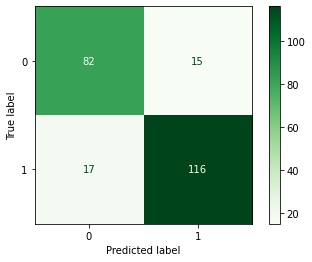

In [ ]:
RF=RandomForestClassifier(bootstrap= True, criterion = 'entropy', max_depth= 15, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators = 550).fit(X_train,y_train)
predRF=RF.predict(X_test)

print(classification_report(y_test,predRF))
plt.figure(figsize=(8,8))
plot_confusion_matrix(logistic,X_test,y_test,cmap=plt.cm.Greens)
plt.show()

In [ ]:
print('Accuracy:',accuracy_score(y_test,predRF))
print('Precision:',precision_score(y_test,predRF,average='macro'))
print('Recall:',recall_score(y_test,predRF,average='macro'))
print('f1-score:',f1_score(y_test,predRF,average='macro'))

Accuracy: 0.8826086956521739
Precision: 0.881023153942428
Recall: 0.8775676304162467
f1-score: 0.8791334981218007


In [ ]:
#XGBoost
xgb = XGBClassifier(random_state = 100)
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}
clf_xgb = GridSearchCV(xgb, param_grid=param_grid,cv = 10, verbose = 2, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
XGB
Best Score: 0.869160272804774
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.55}


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        97
           1       0.88      0.84      0.86       133

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.85      0.84      0.84       230



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x576 with 0 Axes>

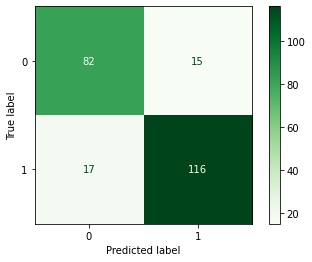

In [ ]:
XGB=XGBClassifier(colsample_bytree= 0.75, gamma=2, learning_rate= 0.5, min_child_weight= 0.01, n_estimators= 500,  reg_alpha= 1, reg_lambda= 10, sampling_method= 'uniform', subsample= 0.55).fit(X_train,y_train)
predXGB=XGB.predict(X_test)

print(classification_report(y_test,predXGB))
plt.figure(figsize=(8,8))
plot_confusion_matrix(logistic,X_test,y_test,cmap=plt.cm.Greens)
plt.show()

In [ ]:
print('Accuracy:',accuracy_score(y_test,predXGB))
print('Precision:',precision_score(y_test,predXGB,average='macro'))
print('Recall:',recall_score(y_test,predXGB,average='macro'))
print('f1-score:',f1_score(y_test,predXGB,average='macro'))

Accuracy: 0.8434782608695652
Precision: 0.8390031343169482
Recall: 0.8437330439500814
f1-score: 0.8407692307692307


Berdasarkan ouput di atas diperoleh bahwa nilai akurasi dan f1 score tertinggi terletak pada klasifikasi dengan metode Random Forest yaitu masing-masing sebesar 88,26% dan 87,21%. Sehingga kesimpulan yang dapat diambil adalah Random Forest lebih cocok digunakan untuk klasifikasi pada dataset Heart Failure.

# **Referensi**

- https://algotech.netlify.app/blog/gridsearchcv/
- https://commons.wikimedia.org/wiki/File:K-fold_cross_validation.jpg

- https://mti.binus.ac.id/2017/11/24/10-fold-cross-validation/

- https://www.pengalaman-edukasi.com/2020/04/apa-itu-k-fold-cross-validation.html
- https://www.researchgate.net/figure/Comparison-between-a-grid-search-and-b-random-search-for-hyper-parameter-tuning-The_fig2_341691661
- https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/
- https://www.kaggle.com/code/kenjee/titanic-project-example